第十章 Canny边缘检测

使用多级边缘检测算法检测边缘的办法。

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

Canny边缘检测分为如下几个步骤：
1.去噪。噪声会影响边缘检测的准确性，因此首先要将噪声过滤掉。
2.计算梯度的幅度与方向。
3.非极大值抑制，即适当地让边缘“变瘦”
4.确定边缘。使用双阈值算法确定最终的边缘信息。

应用高斯滤波取出图像噪声（高斯滤波是带距离权重的滤波）
滤波的目的是平滑一些纹理较弱的非边缘区域，以便得到更准确的边缘。

计算梯度，梯度的方向与边缘的方向是垂直的（可能意思是相切的）
边缘检测算子返回水平方向的Gx和垂直方向的Gy，梯度的幅度和方向θ为：
G = (Gx^2+Gy^2)^(1/2);
θ=atan2(Gy,Gx),其中atan2表示有两个参数的arctan函数。

在获得幅度和方向后，遍历图像中的像素，去除所有非边缘的点。
具体步骤为：遍历像素点，判断像素点是否是周围像素点中具有相同梯度方向的最大值。
如果该点是正/负梯度方向上的局部最大值，则保留该点。
如果不是，则抑制该点（归零）

完成上述步骤后，图像内的强边缘已经在当前获取的边缘图像内。但是一些虚边缘可能也在边缘图像内，这些虚边缘可能是真实图像产生的，也可能是噪声产生的，对于后者，必须将其剔除。
设置两个阈值，其中一个是高阈值maxVal，另一个为低阈值minVal。
1.如果当前边缘像素的梯度值大于或等于maxVal,则将其标记为强边缘。
2.如果当前梯度介于两个阈值之间，则标记为虚边缘（需要保留）
3.如果小于或等于minVal,则抑制当前边缘像素。
对于虚边缘，需要进一步处理，如果与强边缘连接，则保留，否则抑制。

(<matplotlib.axes._subplots.AxesSubplot at 0x16fd2d78ac8>,
 <matplotlib.image.AxesImage at 0x16fd2de5f60>)

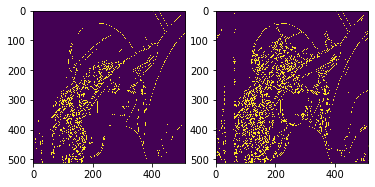

In [4]:
#Canny函数及其使用
#edges = cv2.Canny(image,threshold1,threshold2[,apertureSize[,L2gradient]])
#image : 八位输入图像
#threshold1 ：minVal
#threshold2 : maxVal
#apertureSize:Sobel算子的孔径大小
#L2gradient ：计算图像梯度幅度的标识，默认值为False，如果设置为True，会使用L2范数进行运算，更加精确。
o = cv2.imread("lena.bmp",cv2.IMREAD_GRAYSCALE)
r1 = cv2.Canny(o,128,200)
r2 = cv2.Canny(o,32,128)
plt.subplot(121),plt.imshow(r1)
plt.subplot(122),plt.imshow(r2)